In [140]:
from zipfile import ZipFile
import pandas as pd

dz = ZipFile("/content/titanic.zip")
data = pd.read_csv(dz.open("train.csv"))
data_copy = data.copy()

data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [141]:
data.drop(columns = "PassengerId", inplace = True, axis = 1)

In [142]:
(data.isnull().sum() / data.shape[0]) * 100

,0
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,77.104377


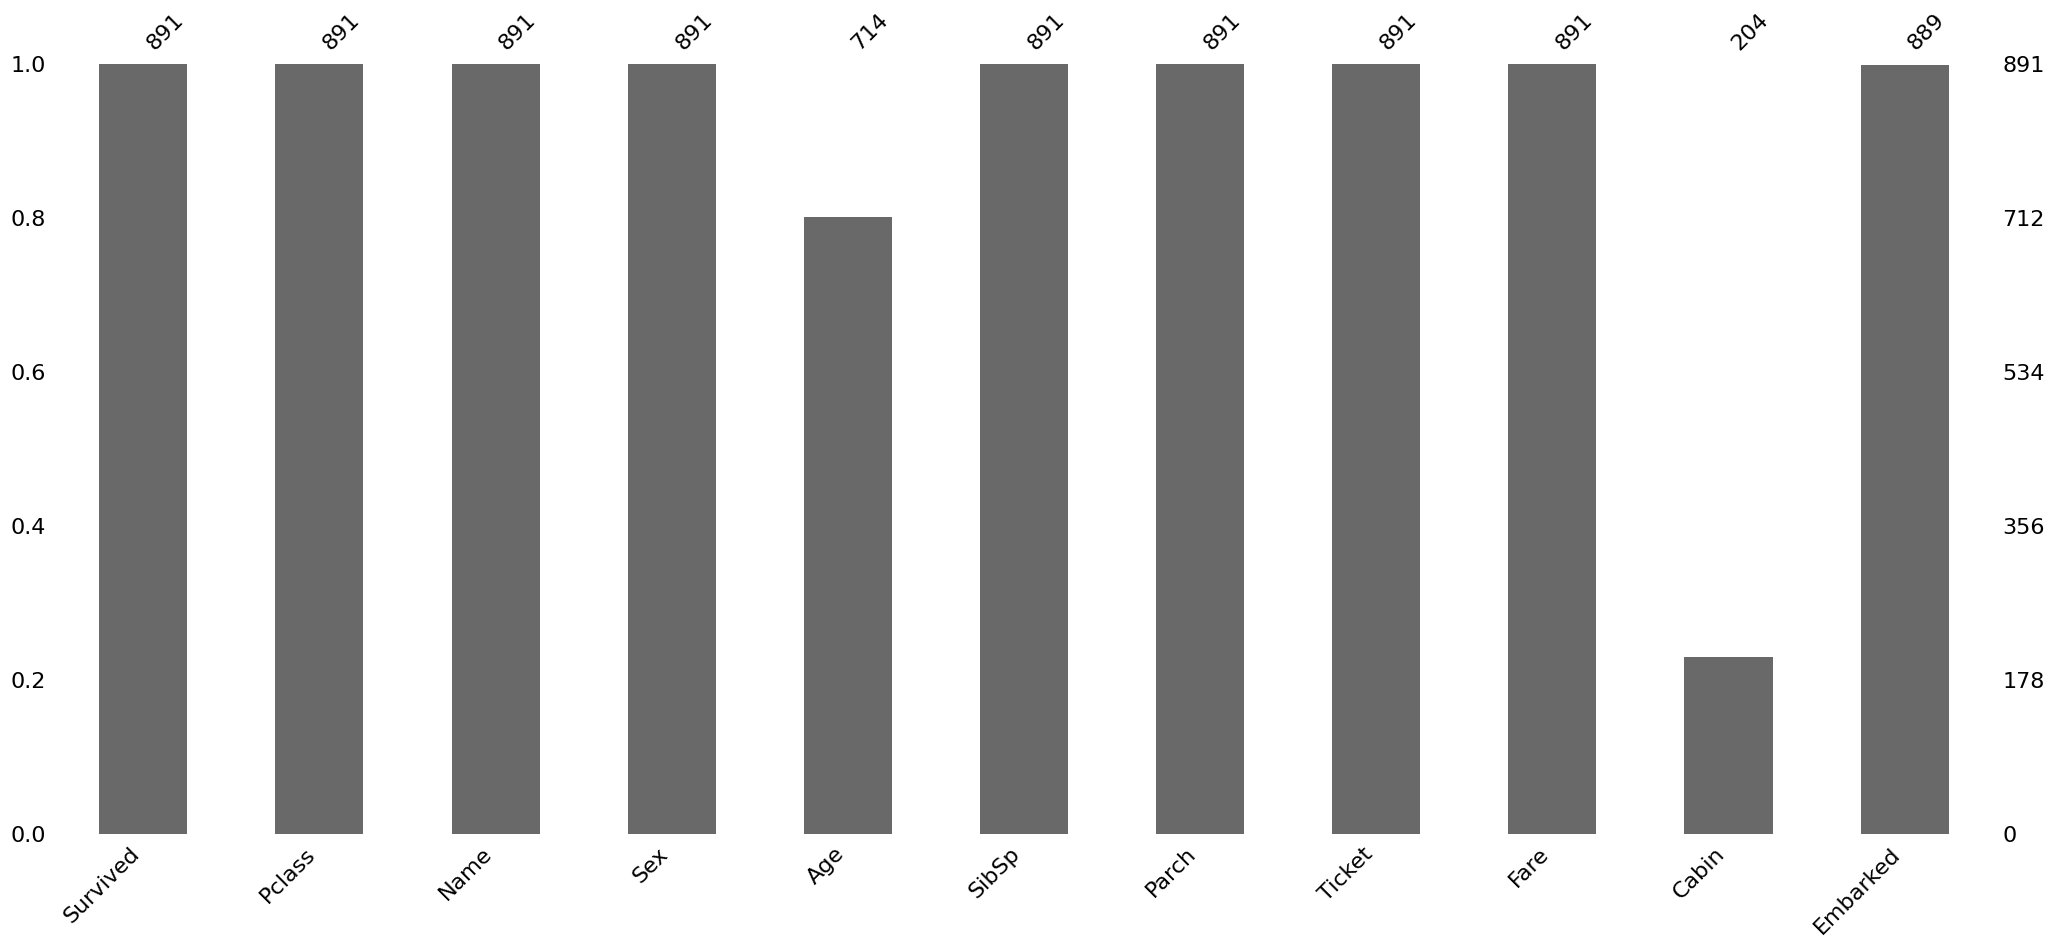

In [143]:
#Visualize null values
import missingno as ms
import matplotlib.pyplot as plt

ms.bar(data)
plt.show()

In [144]:
data.drop(columns = 'Cabin', axis = 1, inplace = True)
data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [146]:
#Fill null values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [147]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [148]:
import seaborn as sns

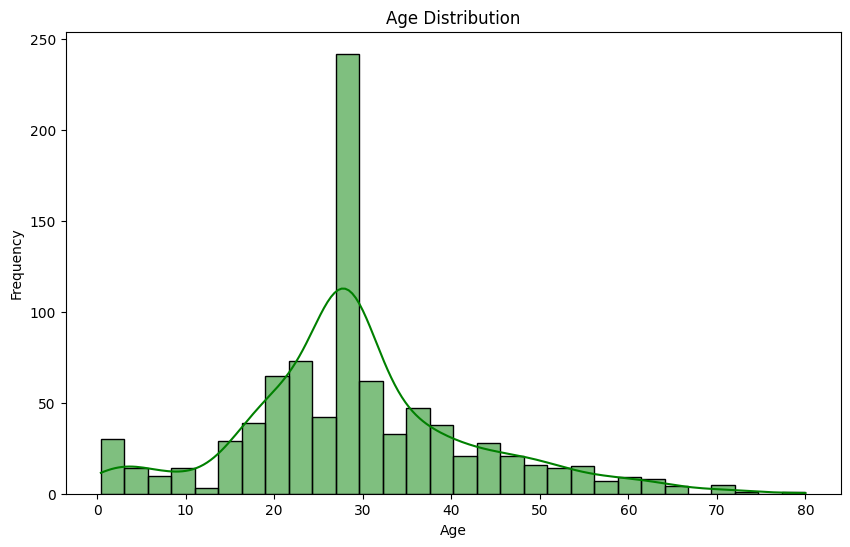

In [149]:
# Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

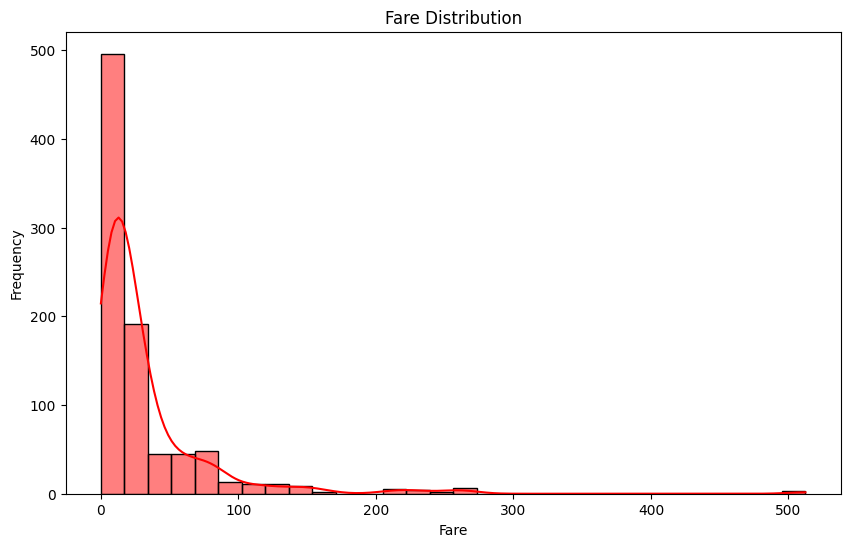

In [150]:
# Fare
plt.figure(figsize = (10, 6))
sns.histplot(data['Fare'], bins = 30, kde = True, color = 'red')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

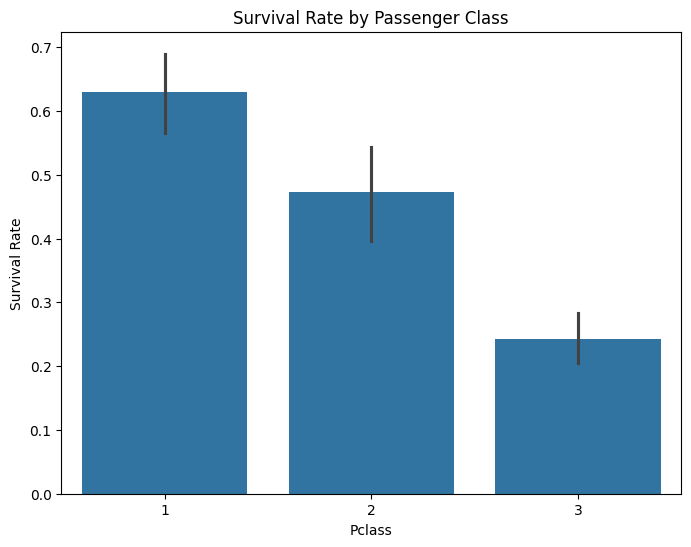

In [151]:
# Survival Rate by Passenger Class
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Pclass', y = 'Survived', data = data)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

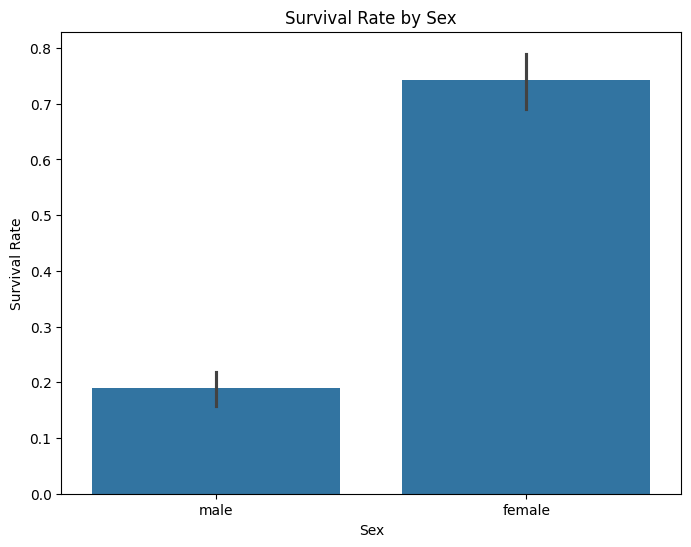

In [152]:
# Survival Rate by Sex
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Sex', y = 'Survived', data = data)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

<ipython-input-153-78fa0eb060d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Embarked', data = data, palette = "pastel")


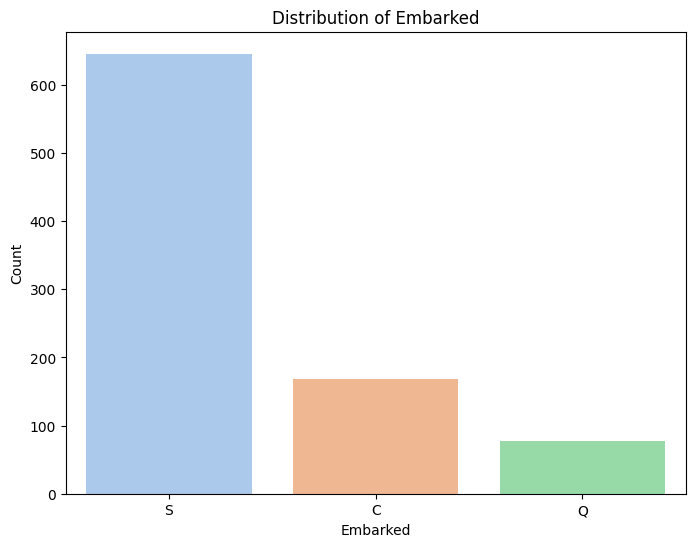

In [153]:
# Embarked
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Embarked', data = data, palette = "pastel")
plt.title("Distribution of Embarked")
plt.ylabel("Count")
plt.show()

In [154]:
print(data.select_dtypes(include = 'object').columns)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [155]:
#encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y = data['Survived']
x = data[['Age', 'Pclass', 'Sex', 'Fare', 'Embarked']]

pc = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['Age','Fare']),
         ('cat', OneHotEncoder(drop = 'first'), ['Sex', 'Embarked'])])

x = pc.fit_transform(x)

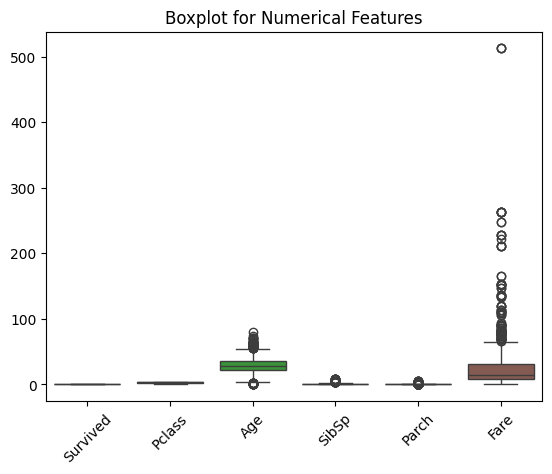

In [156]:
#outliers check
numeric = data.select_dtypes(include = ['float64', 'int64']).columns

sns.boxplot(data = data[numeric])
plt.xticks(rotation=45)
plt.title('Boxplot for Numerical Features')
plt.show()

In [157]:
#Z-score
from scipy.stats import zscore

z = data[numeric].apply(zscore)
out = (z.abs() > 3).sum()
print(f"Number of outliers per column \n{out}")

Number of outliers per column 
Survived     0
Pclass       0
Age          7
SibSp       30
Parch       15
Fare        20
dtype: int64


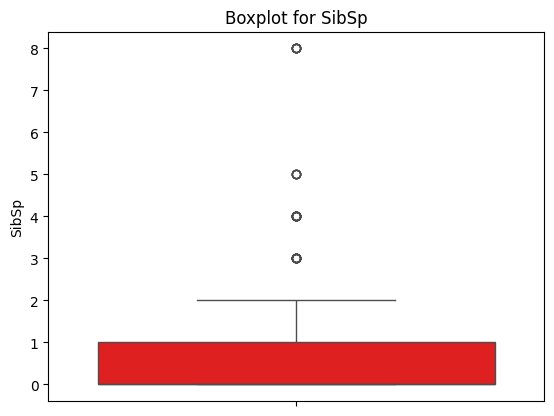

In [158]:
#visualize outliers

sns.boxplot(data = data['SibSp'], color = 'red')
plt.title("Boxplot for SibSp")
plt.show()

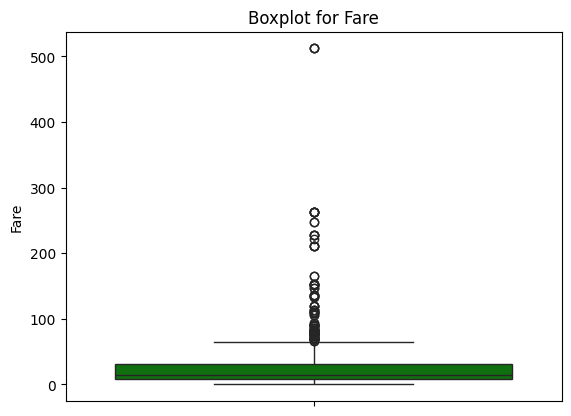

In [159]:
sns.boxplot(data = data['Fare'], color = 'green')
plt.title("Boxplot for Fare")
plt.show()

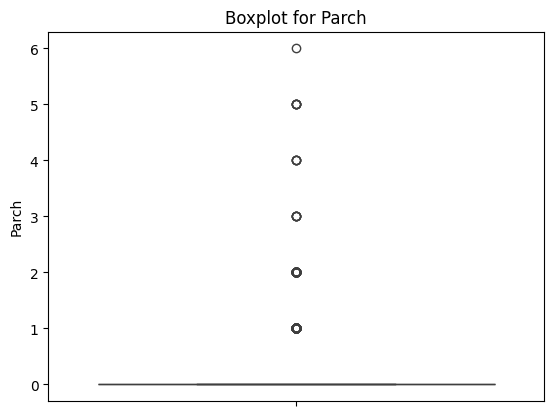

In [160]:
sns.boxplot(data = data['Parch'])
plt.title("Boxplot for Parch")
plt.show()

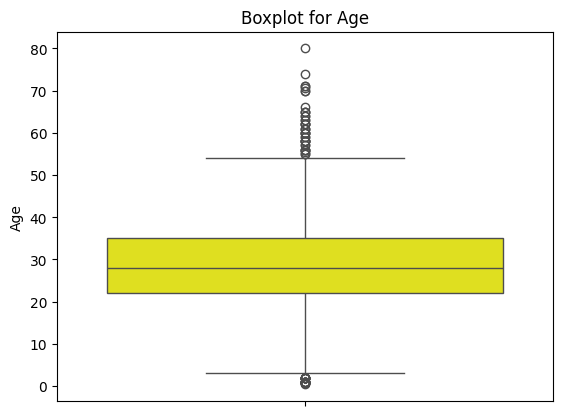

In [161]:
sns.boxplot(data = data['Age'], color = 'yellow')
plt.title("Boxplot for Age")
plt.show()

In [162]:
data.shape

(891, 10)

In [163]:
#Removing outliers

for i in ['SibSp', 'Age', 'Fare', 'Parch']:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - (iqr * 1.5)
  upper = q3 + (iqr * 1.5)
  data = data[(data[i] >= lower) & (data[i] <= upper)]

In [165]:
#Spliting data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [166]:
#Model

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

def f(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim = input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model

input = x_train.shape[1]
model = f(input)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1)

In [169]:
# Train the Model
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6435 - loss: 0.6313 - val_accuracy: 0.7709 - val_loss: 0.5692
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7631 - loss: 0.5401 - val_accuracy: 0.7598 - val_loss: 0.5274
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7546 - loss: 0.5393 - val_accuracy: 0.7765 - val_loss: 0.5064
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4775 - val_accuracy: 0.7765 - val_loss: 0.4996
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7667 - loss: 0.5065 - val_accuracy: 0.7765 - val_loss: 0.4962
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7965 - loss: 0.4855 - val_accuracy: 0.7765 - val_loss: 0.4942
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 0.4927 - val_accuracy: 0.7765 - val_loss: 0.4957
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7665 - loss: 0.5063 - val_accuracy: 0.7765 - val_loss

In [173]:
# Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"\nLoss: {round(loss * 100, 2)}")
print(f"Accuracy: {round(accuracy * 100, 2)}")

# Predictions
pred = (model.predict(x_test) > 0.5).astype("int32")

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.4875 

Loss: 49.42
Accuracy: 77.65
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
[[87 18]
 [22 52]]


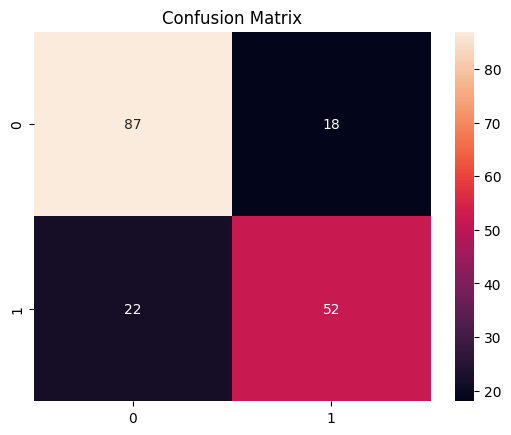

In [179]:
#visualize confusion matrix

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, fmt = 'd', annot = True)
plt.title("Confusion Matrix")
plt.show()

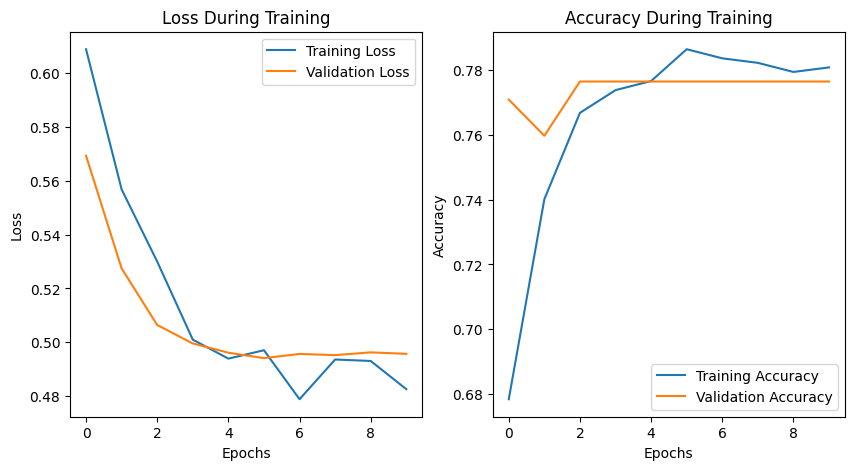

In [180]:
def plot_training_history(history):

    plt.figure(figsize=(10, 5))
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)